In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings

from math import sqrt
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from pmdarima import auto_arima

from statsmodels.tsa.api import VAR, VARMAX
from statsmodels.tsa.stattools  import   grangercausalitytests, adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [3]:
#importing data
data0=pd.read_csv(r'DailyDelhiClimate.csv', index_col=0,parse_dates=True)
x0=data0["meantemp"].values


In [4]:

#checking for stationarity

adfullertest=adfuller(data0['meantemp'], autolag='AIC')
pvalue=adfullertest[1]
print(pvalue)


0.148825015640405


C:\Users\nashi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


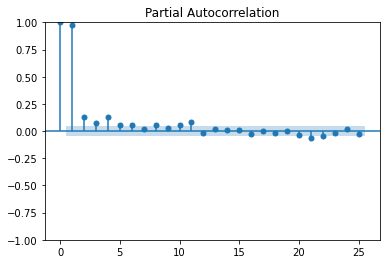

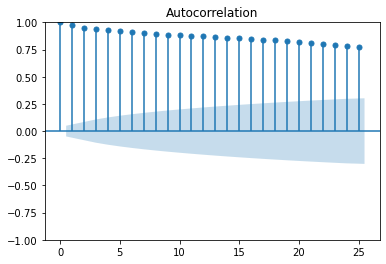

In [5]:
#Figuring out the best number of lags to consider

pacf=plot_pacf(data0['meantemp'],lags=25)
acf=plot_acf(data0['meantemp'],lags=25)


In [6]:
#Training and testing sets
train0=data0.iloc[:len(x0)-7,0]
test0=data0.iloc[len(x0)-7:,0]


In [7]:
#training the data

model0=AutoReg(train0,lags=4).fit()
print(model0.summary())


                            AutoReg Model Results                             
Dep. Variable:               meantemp   No. Observations:                 1568
Model:                     AutoReg(4)   Log Likelihood               -2971.394
Method:               Conditional MLE   S.D. of innovations              1.618
Date:                Thu, 29 Aug 2024   AIC                           5954.788
Time:                        16:43:46   BIC                           5986.918
Sample:                    01-05-2013   HQIC                          5966.733
                         - 04-17-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5146      0.149      3.458      0.001       0.223       0.806
meantemp.L1     0.8052      0.025     32.156      0.000       0.756       0.854
meantemp.L2     0.0637      0.032      1.974    

C:\Users\nashi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


C:\Users\nashi\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


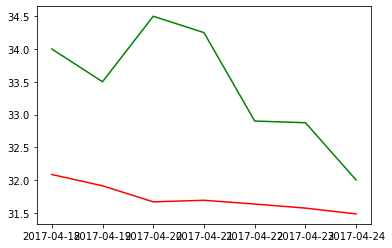

In [8]:
#predicting

pred0=model0.predict(start=len(train0),end=len(x0)-1,dynamic=False)
pyplot.plot(pred0,color='red')
pyplot.plot(test0,color='green')


In [35]:
#calculating the root sqared mean error and mean to analyze the accuracy of the model

R0=sqrt(mean_squared_error(pred0,test0))
print(R0)


1.86479379733119


In [11]:
x=data0["meantemp"].values


In [13]:
#Figuring out the best order of p,d,q for the ARIMA model

warnings.filterwarnings("ignore")
arima=auto_arima(data0['meantemp'], trace=True, suppress_warnings=True)
arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5981.718, Time=1.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10750.521, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6070.450, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9113.459, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14767.938, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=6008.809, Time=0.49 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5979.872, Time=0.74 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6030.395, Time=0.35 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=6039.023, Time=0.32 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5981.684, Time=1.29 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=6029.232, Time=0.45 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=5981.674, Time=1.45 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5982.905, Time=0.15 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 6.976 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1575
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -2984.936
Date:                Thu, 29 Aug 2024   AIC                           5979.872
Time:                        16:45:58   BIC                           6006.682
Sample:                    01-01-2013   HQIC                          5989.835
                         - 04-24-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0486      0.026      1.873      0.061      -0.002       0.099
ar.L1          1.5797      0.048     33.157      0.000       1.486       1.673
ar.L2         -0.5817      0.047    -12.335      0.000      -0.674      -0.489
ma.L1         -0.7998      0.038    -20.972      0.000      -0.875      -0.725
sigma2         2.5865      0.076     33.964      0.000       2.437       2.736
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               216.19
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.42
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
#creating training and testing sets

train=data0.iloc[:len(x)-7,0]
test=data0.iloc[len(x)-7:,0]


In [16]:
#training the model with the recommended p,d,q =>(1,1,1)

model=sm.tsa.arima.ARIMA(train,order=(1,1,1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1568
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2971.606
Date:                Thu, 29 Aug 2024   AIC                           5949.213
Time:                        16:46:28   BIC                           5965.284
Sample:                    01-01-2013   HQIC                          5955.187
                         - 04-17-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5873      0.045     13.081      0.000       0.499       0.675
ma.L1         -0.8070      0.035    -22.837      0.000      -0.876      -0.738
sigma2         2.5979      0.071     36.659      0.000       2.459       2.737
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               237.27
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.43
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2017-04-18    31.956774
2017-04-19    31.605109
2017-04-20    31.398575
2017-04-21    31.277277
2017-04-22    31.206038
2017-04-23    31.164199
2017-04-24    31.139627
Freq: D, Name: predicted_mean, dtype: float64


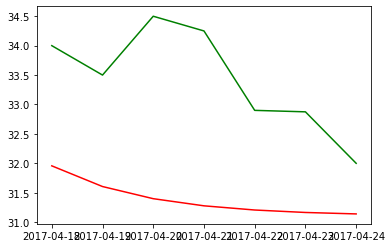

In [18]:
#predicting the temperature of the last week and plotting the original values against the forecasted values.

prediction=model.predict(start=len(train),end=len(train)+len(test)-1,typ='levels')
pyplot.plot(prediction, color ='red')
pyplot.plot(test,color='green')
print(prediction)


In [34]:
#calculating the root sqared mean error and mean to analyze the accuracy of the model

R=sqrt(mean_squared_error(test,prediction))
print(R)


2.1632613121057997


In [22]:
#finding out the correlation between the humidty/ windspeed and mean temperature

meantemp_diff=adfuller(data0['meantemp'].diff()[1:])
print(meantemp_diff[1])
humidity_diff=adfuller(data0['humidity'])
print(humidity_diff[1])
windspeed_diff=adfuller(data0['wind_speed'])
print(windspeed_diff[1])

9.593523125673691e-30
0.005064231001719692
0.0013757830979997442


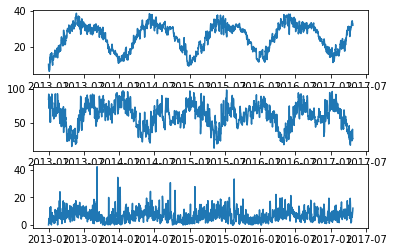

In [23]:
#plotting all subplots of dependant variables
fig, axs=pyplot.subplots(nrows=3,ncols=1)
for i, ax in enumerate(axs.flatten()):
    tempdata=data0[data0.columns[i]]
    ax.plot(tempdata)


In [25]:
#creating training and testing sets

data2=data0[['meantemp','humidity','wind_speed']]
train2=data2[:len(x)-7]
test2=data2[len(x)-7:]

In [27]:
#finding out the best number of lags to consider

g1=grangercausalitytests(data0[['meantemp','humidity']],1)
g2=grangercausalitytests(data0[['meantemp','wind_speed']],6)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.2286  , p=0.0127  , df_denom=1571, df_num=1
ssr based chi2 test:   chi2=6.2405  , p=0.0125  , df=1
likelihood ratio test: chi2=6.2282  , p=0.0126  , df=1
parameter F test:         F=6.2286  , p=0.0127  , df_denom=1571, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6814  , p=0.0552  , df_denom=1571, df_num=1
ssr based chi2 test:   chi2=3.6885  , p=0.0548  , df=1
likelihood ratio test: chi2=3.6842  , p=0.0549  , df=1
parameter F test:         F=3.6814  , p=0.0552  , df_denom=1571, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.2319  , p=0.0054  , df_denom=1568, df_num=2
ssr based chi2 test:   chi2=10.4971 , p=0.0053  , df=2
likelihood ratio test: chi2=10.4622 , p=0.0053  , df=2
parameter F test:         F=5.2319  , p=0.0054  , df_denom=1568, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.6733  , p=0.

In [28]:
#training the model

model2=VAR(train2.diff()[1:])
so=model2.select_order(maxlags=20)
print(so.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        7.751       7.762       2325.       7.755
1        7.594       7.635       1986.       7.609
2        7.464       7.537       1745.       7.491
3        7.371       7.475       1589.       7.410
4        7.324      7.458*       1516.       7.374
5        7.293       7.459       1470.       7.355
6        7.280       7.477       1450.      7.353*
7        7.270       7.498       1436.       7.355
8        7.270       7.529       1437.       7.367
9        7.262       7.552       1425.       7.370
10       7.249       7.571       1407.       7.369
11       7.248       7.600       1405.       7.379
12       7.254       7.638       1414.       7.397
13       7.260       7.674       1422.       7.414
14       7.263       7.709       1427.       7.429
15      7.247*       7.724      1404.*       7.424
16       7.255       7.762     

In [29]:
model2_1=VARMAX(train2,order=(6,0), enforce_stationarity=True)
model2_2=model2_1.fit()
print(model2_2.summary())


                                     Statespace Model Results                                     
Dep. Variable:     ['meantemp', 'humidity', 'wind_speed']   No. Observations:                 1568
Model:                                             VAR(6)   Log Likelihood              -12271.007
                                              + intercept   AIC                          24668.013
Date:                                    Thu, 29 Aug 2024   BIC                          25005.539
Time:                                            16:51:54   HQIC                         24793.475
Sample:                                        01-01-2013                                         
                                             - 04-17-2017                                         
Covariance Type:                                      opg                                         
Ljung-Box (L1) (Q):       0.00, 0.05, 0.01   Jarque-Bera (JB):   269.44, 259.60, 8390.99
Prob(Q):            

In [30]:
#predicting

forecast_no=7
prediction2=model2_2.get_prediction(start=len(train2), end=len(train2)+forecast_no-1)
prediction2_2=prediction2.predicted_mean
prediction2_2.columns=['MeanTempPredicted','HumidityPredicted','WindSpeedPredicted']




<AxesSubplot:>

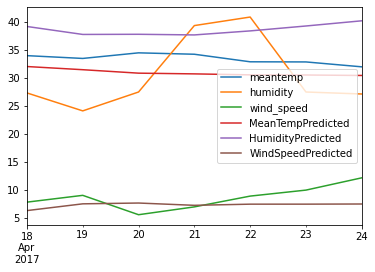

In [31]:
original_prediction=pd.concat([test2,prediction2_2], axis=1)
original_prediction.plot()

In [33]:
#Checking accuracy using root mean squared error

R2=sqrt(mean_squared_error(prediction2_2['MeanTempPredicted'],test2['meantemp']))
print(R2)


2.581832527300571
